In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [5]:
from sklearn import linear_model

In [6]:
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()

In [11]:
X = iris.data

In [14]:
Y = iris.target

In [15]:
X.shape

(150, 4)

In [16]:
Y.shape

(150,)

In [17]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [18]:
iris_df =DataFrame(X,columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [19]:
iris_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
iris_target = DataFrame(Y,columns =['Species'])

In [22]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [24]:
a = lambda n: {1:'A',2:'B',3:'C'}[n]

In [28]:
a(2)

'B'

In [29]:
iris_target['Species'] = iris_target['Species'].apply(lambda num:{0:'Setosa',1:'Versicolor',2:'Virginica'}[num])

In [30]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [31]:
iris_target.tail()

,Species
145,Virginica
146,Virginica
147,Virginica
148,Virginica
149,Virginica


In [34]:
iris = pd.concat([iris_df,iris_target],axis  = 1)
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


C:\Users\Varun\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


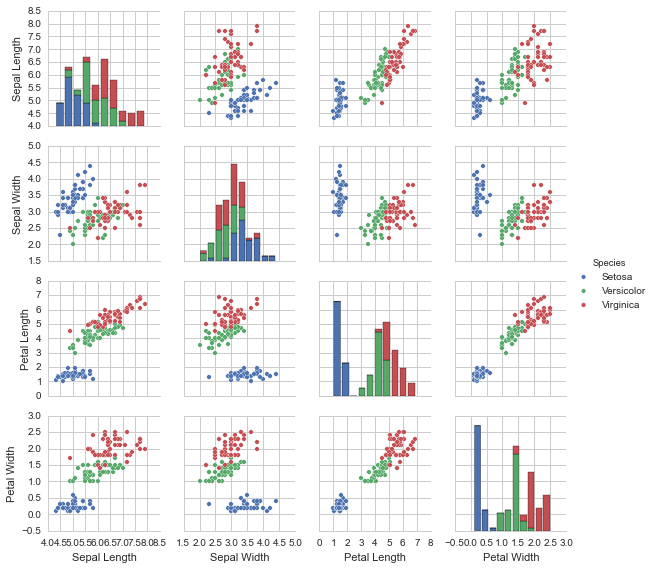

In [35]:
sns.pairplot(iris,hue='Species',size=2)

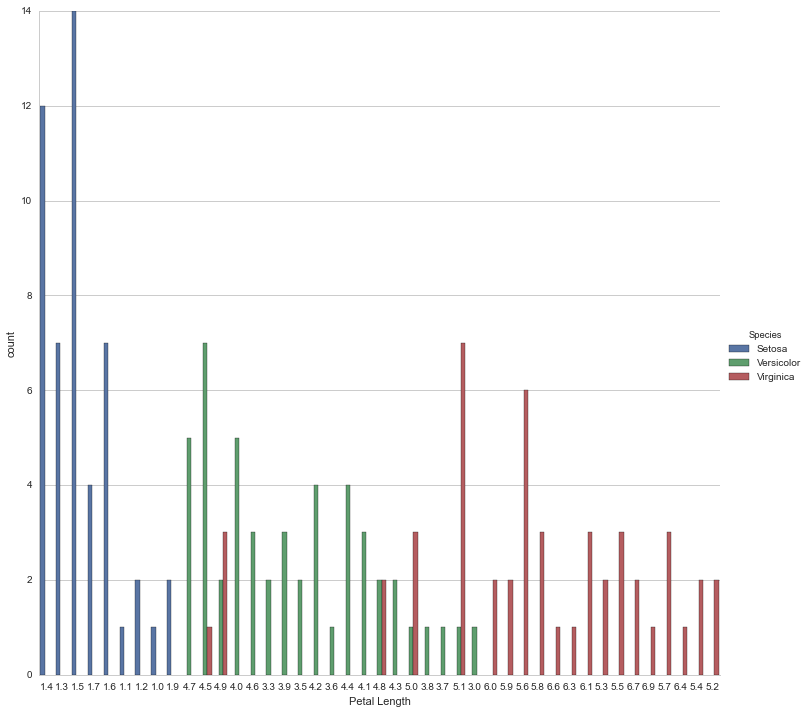

In [39]:
sns.factorplot('Petal Length',data=iris,hue='Species',size = 10, kind = 'count')